In [34]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.figure.Figure

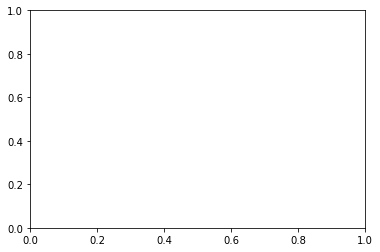

In [12]:
%matplotlib inline
fig,_ = plt.subplots()
type(fig)

In [14]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Real plotting process
1) Get current Figure  
2) Get current Axes  
3) use 'plot()' function of Axes  

plt.plot() == plt.gcf().gca().plot()

[]

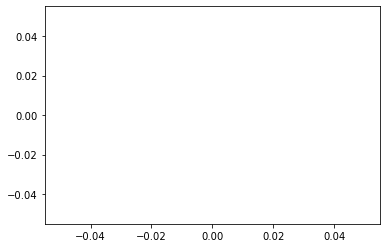

In [21]:
plt.gcf().gca().plot()

In [33]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size = (3, rng.size))
yrs = 1950 + rng

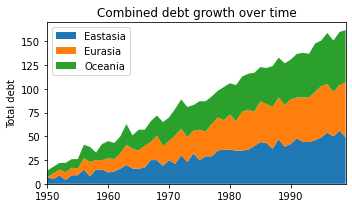

In [59]:
fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs, rng+rnd, labels = ['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
plt.gcf().gca().set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

In [35]:
x = np.random.randint(low = 1, high = 11, size = 50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack([x, y])

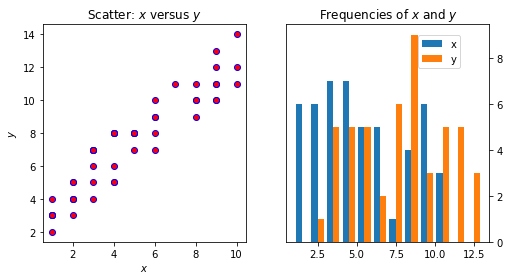

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

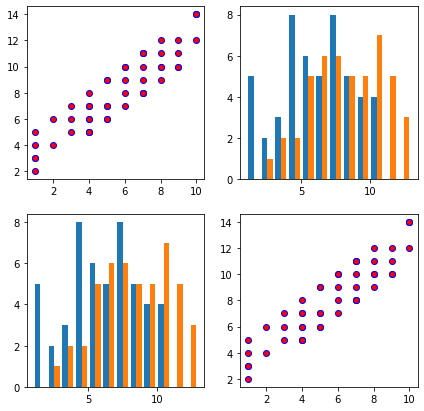

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

ax1, ax2, ax3, ax4 = ax.ravel()

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax3.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax4.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')

In [57]:
from io import BytesIO
from urllib.request import urlopen
import tarfile

In [58]:
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'

In [77]:
b = BytesIO(urlopen(url).read())

fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [96]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [97]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

In [105]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')

ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

In [111]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

In [114]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


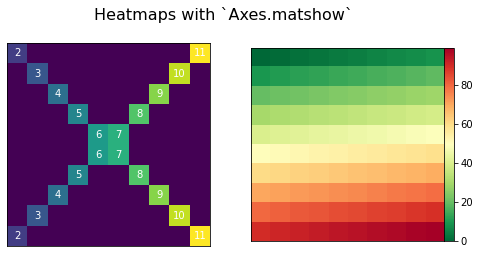

In [115]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

In [124]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

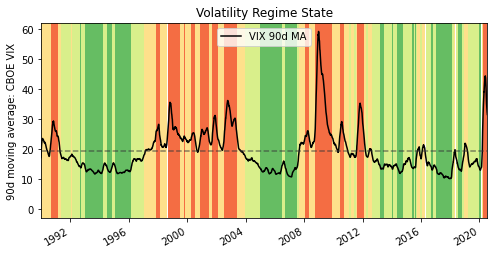

In [127]:
cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')

ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

### Datashader 

In [4]:
import datashader as ds
import pandas as pd
from colorcet import fire
from datashader import transfer_functions as tf

In [2]:
df = pd.read_csv('./data/datashader-examples/data/nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y'])

In [5]:
df.head()

,dropoff_x,dropoff_y
0,-8.234835e+06,4.975627e+06
1,-8.237021e+06,4.976875e+06
2,-8.238124e+06,4.971127e+06
3,-8.238108e+06,4.974457e+06
4,-8.236804e+06,4.975483e+06


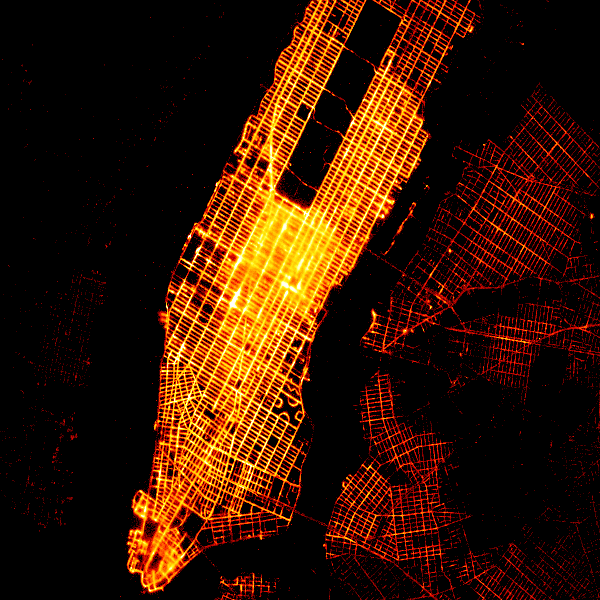

In [7]:
agg = ds.Canvas().points(df, 'dropoff_x', 'dropoff_y')
tf.set_background(tf.shade(agg, cmap=fire), "black")